A Simple RNN Task: 利用RNN的二元分类网络区分不同函数

In [10]:
%pip install torch numpy matplotlib 
# restart kernel after installation

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
DATA_SIZE = 1000

sine_data_size = np.random.randint(int(0.3 * DATA_SIZE), int(0.7 * DATA_SIZE))
sigmoid_data_size = DATA_SIZE - sine_data_size

steps = np.arange(0, 10, 0.5)

# generate sine-like function samples
sine_init = np.random.uniform(-3, 3, (sine_data_size, 2))  # randomize a and b for sin(ax+b)
sine_data = np.sin(sine_init[:, :1] * steps + sine_init[:, 1:])

# generate sigmoid-like function samples
sigmoid_init = np.random.uniform(-3, 3, (sigmoid_data_size, 2)) # randomize a and b for 1/(1+e^(-ax+b))
sigmoid_data = 1 / (1 + np.exp(0 - sigmoid_init[:, :1] * steps + sigmoid_init[:, 1:]))

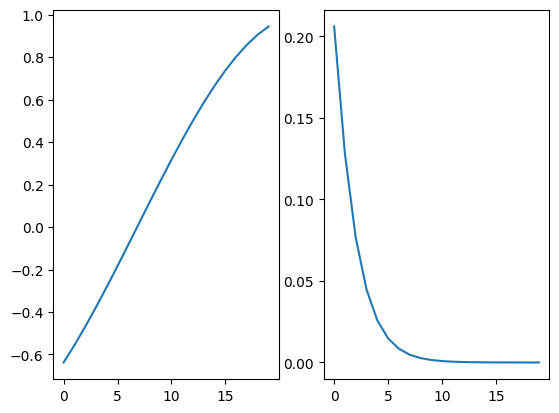

In [13]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(sine_data[0])
axs[1].plot(sigmoid_data[1])

In [14]:
# mix data
sine_data = np.concatenate((sine_data, np.ones((sine_data_size, 1))), axis=1)
sigmoid_data = np.concatenate((sigmoid_data, np.zeros((sigmoid_data_size, 1))), axis=1)
data = np.concatenate((sine_data, sigmoid_data), axis=0)
data = torch.Tensor(data)

In [15]:
# split two datasets

from torch.utils.data import random_split
train_set, test_set = random_split(data, [0.8, 0.2])


In [16]:
# define network

class SimpleClassificationRNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleClassificationRNN, self).__init__()
        '''
        task 1: write network structure here using nn.RNN
        '''

    def forward(self, seq, hc=None):
        '''
        task 2: write forward process
        '''
        return # out, hc

In [17]:
hidden_size = 16
learning_rate = 0.01

model = SimpleClassificationRNN(hidden_size)

'''
task 3: select appropriate criterion and optimizer
'''
criterion = None
optimizer = None


In [18]:
def cal_accuracy(preds, true_values):
    preds = torch.where(preds>0.5, 1, 0)
    acc = torch.sum(1-torch.abs(preds-true_values)) / preds.shape[0]
    return acc

In [19]:
# training ...

epochs = 500
loss_log = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = model(train_set[:][:, :-1, np.newaxis])
    loss = criterion(output.view(-1), train_set[:][:, -1])
    acc = cal_accuracy(output.view(-1), train_set[:][:, -1])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("Epoch {}: loss {} acc {}".format(epoch, loss.item(), acc))

AttributeError: 'NoneType' object has no attribute 'zero_grad'

In [ ]:
# performance on test set

output, _ = model(test_set[:][:, :-1, np.newaxis])
loss = criterion(output.view(-1), test_set[:][:, -1])
acc = cal_accuracy(output.view(-1), test_set[:][:, -1])

print("Test set: loss {} acc {}".format(loss.item(), acc))

## Example Solution

In [ ]:
# define network

class SimpleClassificationRNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleClassificationRNN, self).__init__()
        self.rnn = nn.RNN(input_size=1,
                          hidden_size=hidden_size,
                          batch_first=True,
                          num_layers=1)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, seq, hc=None):
        tmp, hc = self.rnn(seq, hc)
        out = torch.sigmoid(self.linear(hc[-1, ... ,:]))
        return out, hc

In [ ]:
hidden_size = 16
learning_rate = 0.01

model = SimpleClassificationRNN(hidden_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), learning_rate)

# you can also test other optimizers and learning_rate settings ...

In [ ]:
def cal_accuracy(preds, true_values):
    preds = torch.where(preds>0.5, 1, 0)
    acc = torch.sum(1-torch.abs(preds-true_values)) / preds.shape[0]
    return acc

# you can also implement other metrics like F1 ...

In [ ]:
epochs = 500
loss_log = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = model(train_set[:][:, :-1, np.newaxis])
    loss = criterion(output.view(-1), train_set[:][:, -1])
    acc = cal_accuracy(output.view(-1), train_set[:][:, -1])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("Epoch {}: loss {} acc {}".format(epoch, loss.item(), acc))

# you can also implement early stopping here ...

Epoch 0: loss 0.49771857261657715 acc 0.8237500190734863
Epoch 10: loss 0.4833890497684479 acc 0.8224999904632568
Epoch 20: loss 0.47157391905784607 acc 0.8149999976158142
Epoch 30: loss 0.4592076539993286 acc 0.8212500214576721
Epoch 40: loss 0.44666212797164917 acc 0.8199999928474426
Epoch 50: loss 0.4333392083644867 acc 0.8287500143051147
Epoch 60: loss 0.4181889593601227 acc 0.8349999785423279
Epoch 70: loss 0.40043652057647705 acc 0.8424999713897705
Epoch 80: loss 0.37989476323127747 acc 0.8512499928474426
Epoch 90: loss 0.35129106044769287 acc 0.8849999904632568
Epoch 100: loss 0.27516770362854004 acc 0.9175000190734863
Epoch 110: loss 0.4960095286369324 acc 0.7462499737739563
Epoch 120: loss 0.422473669052124 acc 0.8812500238418579
Epoch 130: loss 0.37811020016670227 acc 0.8487499952316284
Epoch 140: loss 0.3558989465236664 acc 0.8849999904632568
Epoch 150: loss 0.3380361795425415 acc 0.8949999809265137
Epoch 160: loss 0.31917011737823486 acc 0.8999999761581421
Epoch 170: loss 0

In [ ]:
output, _ = model(test_set[:][:, :-1, np.newaxis])
loss = criterion(output.view(-1), test_set[:][:, -1])
acc = cal_accuracy(output.view(-1), test_set[:][:, -1])

print("Test set: loss {} acc {}".format(loss.item(), acc))

Test set: loss 0.07558485120534897 acc 0.9800000190734863
